In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.5.1


In [3]:
import cufflinks as cf

In [4]:
# For Notebooks
init_notebook_mode(connected=True)

In [5]:
goff = pd.read_csv('Goff 2018 NGS.csv',index_col='Play ID')

# Play / Personnel Breakdown

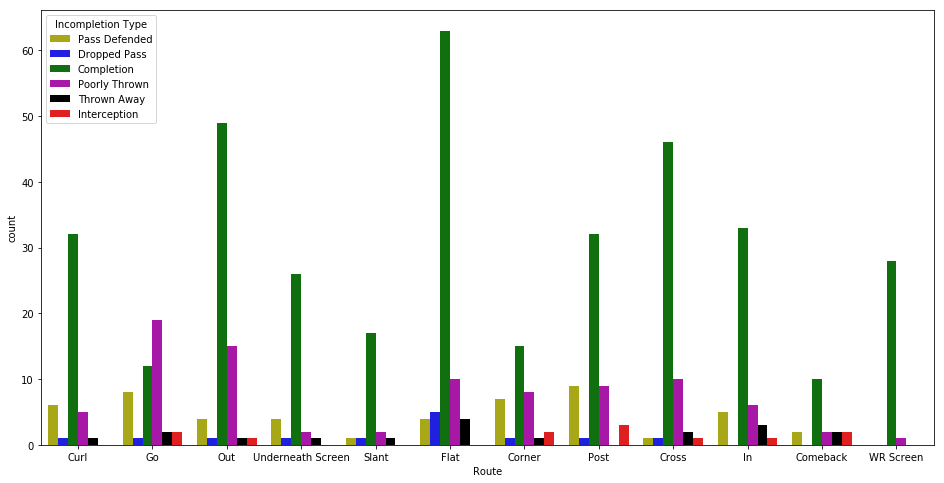

In [10]:
plt.figure(figsize=(16,8))

colors = {'Completion':'g',
         'Dropped Pass':'b',
         'Interception':'r',
         'Poorly Thrown':'m',
         'Pass Defended':'y',
         'Thrown Away':'k'}

sns.countplot(x='Route',hue='Incompletion Type',data=goff,palette=colors)

In [57]:
Target_Route_Count = goff.groupby(by=['Target','Route']).count()['Result'].unstack()
Route_Formation_Count = goff.groupby(by=['Route','Formation']).count()['Result'].unstack()

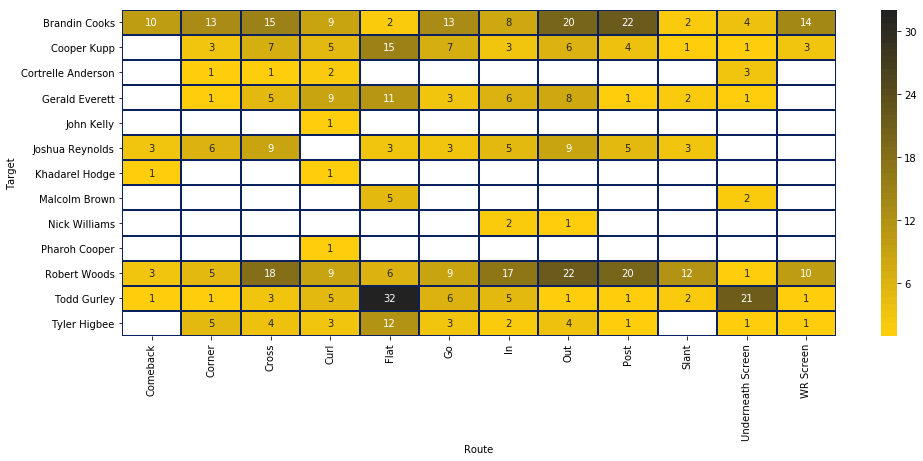

In [66]:
plt.figure(figsize=(16,6))
sns.heatmap(Target_Route_Count,annot=True,cmap=sns.dark_palette(color='#FECE0C',n_colors=50,reverse=True),
           linewidths=1,linecolor='#0B215E')

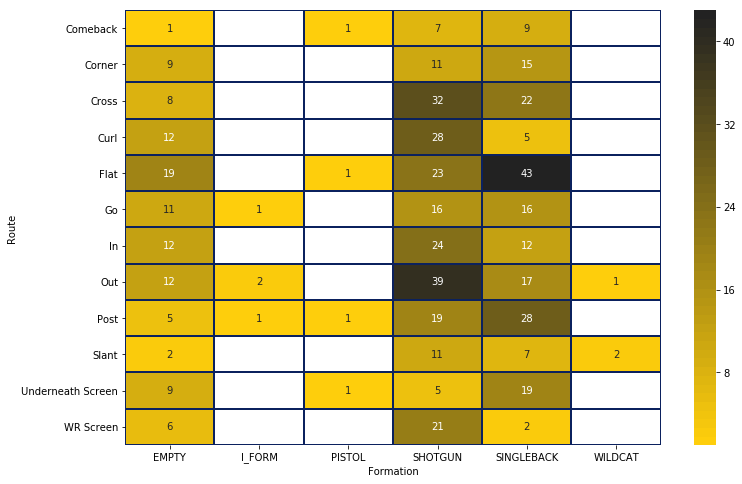

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(Route_Formation_Count,annot=True,cmap=sns.dark_palette(color='#FECE0C',n_colors=50,reverse=True),
           linewidths=1,linecolor='#0B215E')

In [56]:
Target_Route_Comp = goff.groupby(by=['Target','Route']).mean()['Completion'].unstack()
Route_Formation_Comp = goff.groupby(by=['Route','Formation']).mean()['Completion'].unstack()

Text(0.5,1,'Completion % per Route/Target Combo')

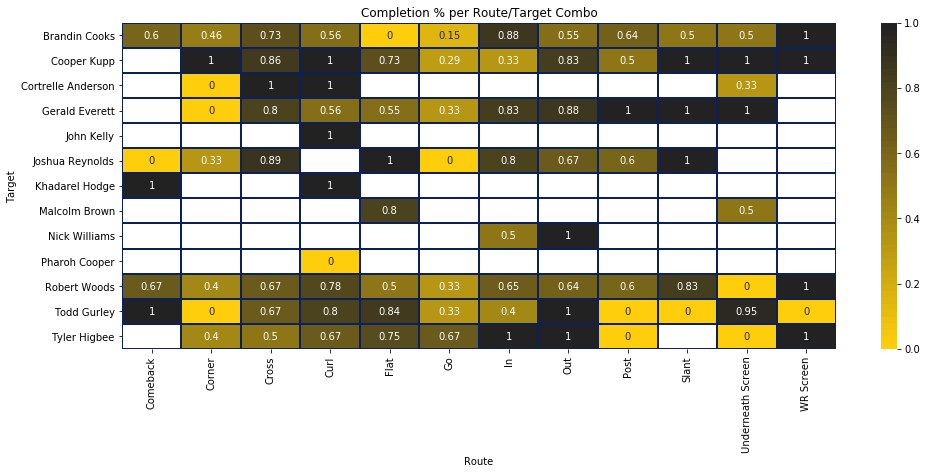

In [64]:
plt.figure(figsize=(16,6))
sns.heatmap(Target_Route_Comp,annot=True,cmap=sns.dark_palette(color='#FECE0C',n_colors=50,reverse=True),
           linewidths=1,linecolor='#0B215E')
plt.title('Completion % per Route/Target Combo')

Text(0.5,1,'Completion % per Route/Formation Combo')

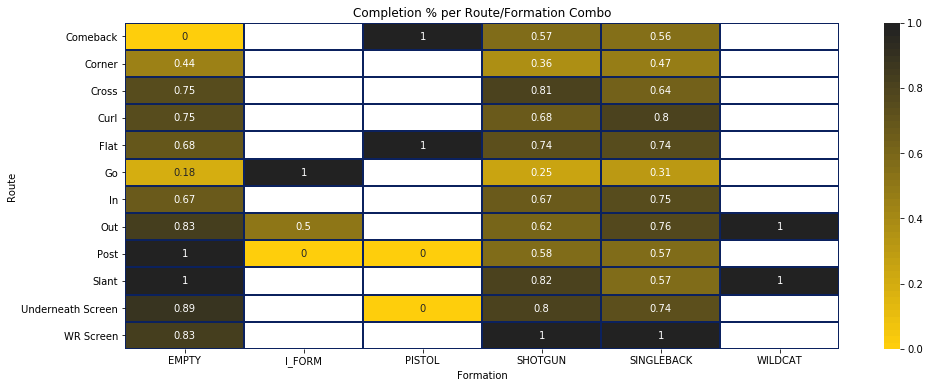

In [63]:
plt.figure(figsize=(16,6))
sns.heatmap(Route_Formation_Comp,annot=True,cmap=sns.dark_palette(color='#FECE0C',n_colors=50,reverse=True),
           linewidths=1,linecolor='#0B215E')
plt.title('Completion % per Route/Formation Combo')

# Pass Attempt Scatter Plots

In [22]:
goff['Incompletion Type'].unique()

array(['Pass Defended', 'Dropped Pass', 'Completion', 'Poorly Thrown',
       nan, 'Thrown Away', 'Interception'], dtype=object)

In [23]:
pass_colors = {'Completion':'#FECE0C','Poorly Thrown':'r','Pass Defended':'r','Dropped Pass':'#FECE0C','Thrown Away':'w','Interception':'r'}

In [50]:
types = list(goff[goff['Incompletion Type'].notnull()]['Incompletion Type'])

In [52]:
colors = [pass_colors[x] for x in types]

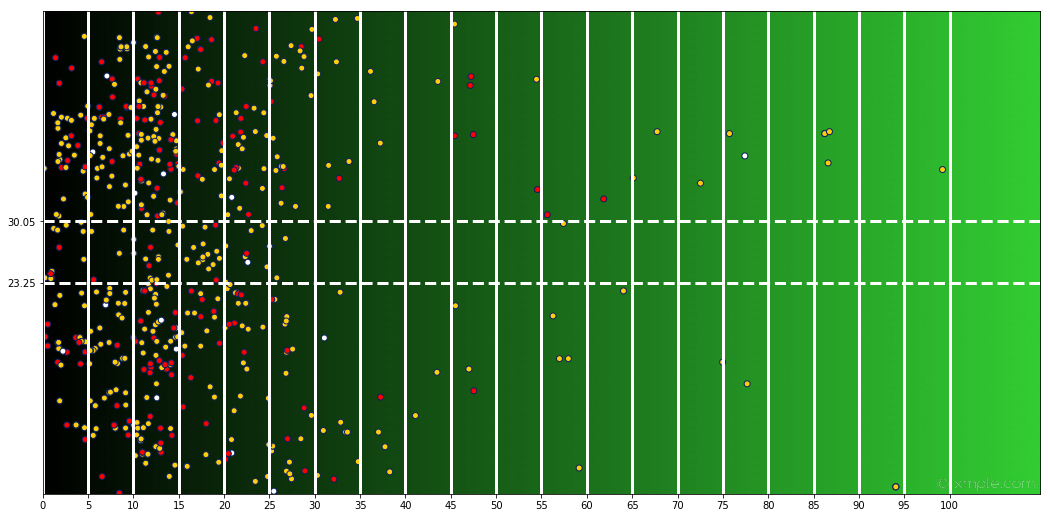

In [53]:
plt.figure(figsize=(18.33,8.89))
plt.scatter(goff['Target X Adj'], goff['Target Y Adj'], c=colors, edgecolors='#0B215E')
#plt.scatter(goff['Target X Adj'], goff['Target Y Adj'], c='#FECE0C', edgecolors='#0B215E')
plt.xticks(np.arange(0, 105, step=5))
plt.grid(color='w',axis='x',lw=3)
plt.yticks([23.25,53.3-23.25])
plt.grid(color='w',axis='y',lw=3,ls='dashed')

from matplotlib import cbook

field = plt.imread('grass2.jpg')
plt.imshow(field, extent=[0,110,0,53.3])
plt.savefig('Chart.png')
plt.show()

In [67]:
grid_count = goff.groupby(by=['X Group','Y Group']).count()['Result'].unstack()
grid_completion_pct = goff.groupby(by=['Y Group','X Group']).mean()['Completion'].unstack()

In [68]:
grid_completion_pct.columns

Index(['0-5 Yds', '10-15 Yds', '15-20 Yds', '20-25 Yds', '25-30 Yds',
       '30-35 Yds', '35-40 Yds', '40-45 Yds', '45-50 Yds', '5-10 Yds',
       '50-55 Yds', '55-60 Yds', '60-65 Yds', '65-70 Yds', '70-75 Yds',
       '75-80 Yds', '85-90 Yds', '90-95 Yds', '95-100 Yds'],
      dtype='object', name='X Group')

In [69]:
grid_completion_pct['80-85 Yds'] = float('NaN')

In [70]:
grid_completion_pct = grid_completion_pct[['0-5 Yds','5-10 Yds','10-15 Yds','15-20 Yds','20-25 Yds','25-30 Yds','30-35 Yds','35-40 Yds',
                     '40-45 Yds','45-50 Yds','50-55 Yds','55-60 Yds','60-65 Yds','65-70 Yds','70-75 Yds','75-80 Yds',
                     '80-85 Yds','85-90 Yds','90-95 Yds','95-100 Yds']]

In [71]:
grid_completion_pct = grid_completion_pct.reindex(axis='index',labels=['Left','Mid-Left','Middle','Mid-Right','Right'])

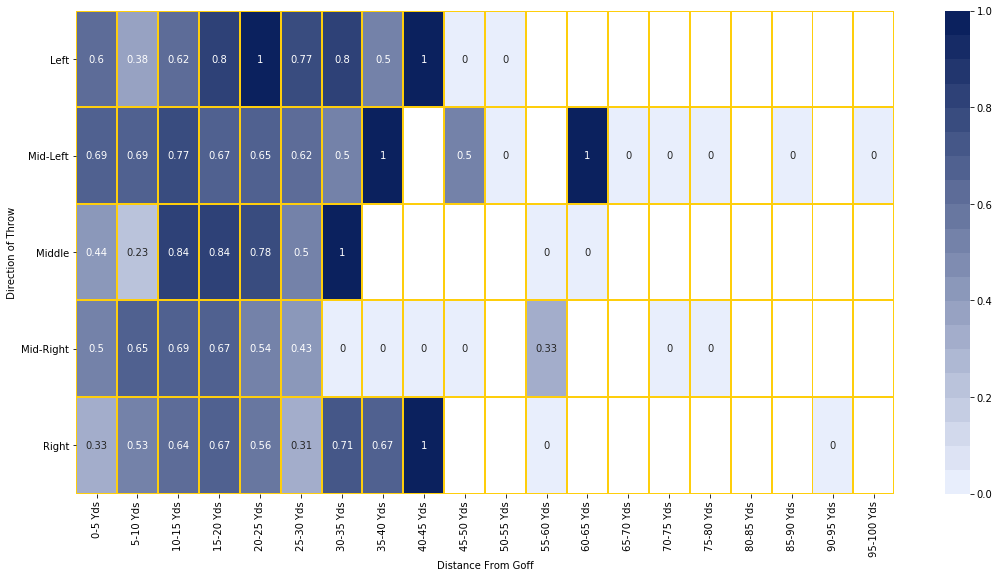

In [78]:
plt.figure(figsize=(18.33,8.89))
sns.heatmap(grid_completion_pct,annot=True,cmap=sns.light_palette(color='#0B215E',n_colors=20,reverse=False),
            alpha=1,linewidths=1,linecolor='#FECE0C')
plt.ylabel(' Direction of Throw ')
plt.xlabel('Distance From Goff')
plt.tick_params(axis='y',labelrotation=0)